### Data Cleanse

#### Ronel Khan

The first step is to import the Pandas library.

In [1]:
import pandas as pd

We then open our Dataset using the pd.read_csv function.  
  
The dataset has been taken from the SDN website; and is a result of a combination of two separate files:  
  
- SDN.csv (https://www.treasury.gov/ofac/downloads/sdn.csv) - which contains all primary names of individuals/entities listed on the SDN List
- ALT.csv (https://www.treasury.gov/ofac/downloads/alt.csv) - which contains all aliases/aka names of individuals and entities listed on the SDN List
  
Using VBA to define a vLookup function which returns multiple values, separated by ';', we were able to extract the aliases/aka names from the ALT.csv file, and add them to our main dataset, SDN.csv.

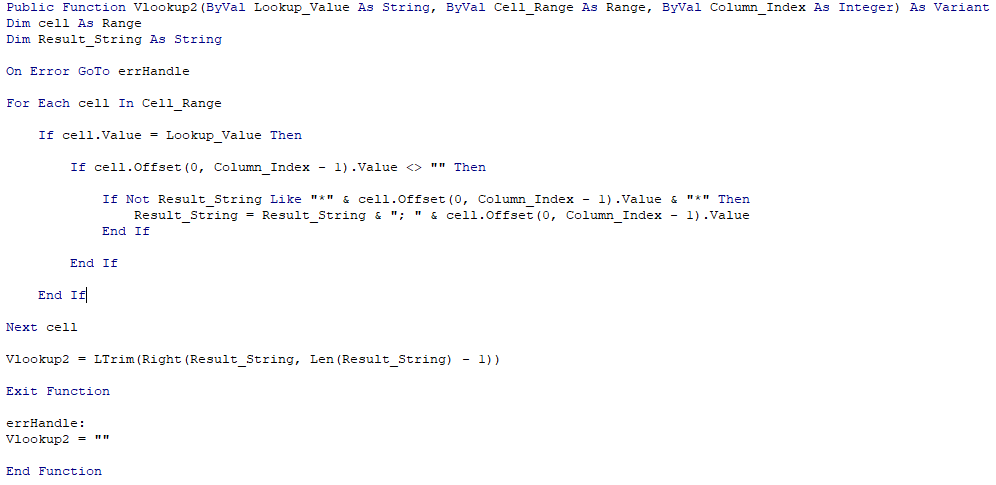

We then called this file 'sdn_complete.csv'. We removed columns containing data that wasn't necessary to our assignment; however, there remained a column which contained mixed data including Passport details, DoBs and instances of aliases. We labelled this column as 'Other' and identified the need to extract all relevant information from this column.


In [2]:
sdn = pd.read_csv("sdn_complete.csv")

Displaying the dataframe, we already realised there were several 'NaN' values which we had to remove.

In [3]:
display(sdn)

,ID,Name,Alias,Other
0,36,AEROCARIBBEAN AIRLINES,AERO-CARIBBEAN,-0-
1,173,"ANGLO-CARIBBEAN CO., LTD.",AVIA IMPORT,-0-
2,306,BANCO NACIONAL DE CUBA,NATIONAL BANK OF CUBA,a.k.a. 'BNC'.
3,424,BOUTIQUE LA MAISON,NaN,-0-
4,475,CASA DE CUBA,NaN,-0-
...,...,...,...,...
8436,29924,"IBRAHIM, Rana Hussein","IBRAHIM, Rana Hussin","DOB 07 Oct 1994; POB Damascus, Syria; national..."
8437,29925,"JEDID, Milad","JADID, Milad; JADEED, Milad; JEDEED, Milad","DOB May 1963; POB Qardaha, Latakia, Syria; nat..."
8438,29942,SYRIAN MINISTRY OF TOURISM,NaN,Website http://www.syriatourism.org; Organizat...
8439,30042,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto","RODRIGUEZ LOPEZ-CALLEJAS, Luis Alberto",DOB 19 Jan 1960; POB Cuba; nationality Cuba; G...


In [4]:
import numpy as np
sdn = sdn.replace(np.nan, '', regex=True)
display(sdn)

,ID,Name,Alias,Other
0,36,AEROCARIBBEAN AIRLINES,AERO-CARIBBEAN,-0-
1,173,"ANGLO-CARIBBEAN CO., LTD.",AVIA IMPORT,-0-
2,306,BANCO NACIONAL DE CUBA,NATIONAL BANK OF CUBA,a.k.a. 'BNC'.
3,424,BOUTIQUE LA MAISON,,-0-
4,475,CASA DE CUBA,,-0-
...,...,...,...,...
8436,29924,"IBRAHIM, Rana Hussein","IBRAHIM, Rana Hussin","DOB 07 Oct 1994; POB Damascus, Syria; national..."
8437,29925,"JEDID, Milad","JADID, Milad; JADEED, Milad; JEDEED, Milad","DOB May 1963; POB Qardaha, Latakia, Syria; nat..."
8438,29942,SYRIAN MINISTRY OF TOURISM,,Website http://www.syriatourism.org; Organizat...
8439,30042,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto","RODRIGUEZ LOPEZ-CALLEJAS, Luis Alberto",DOB 19 Jan 1960; POB Cuba; nationality Cuba; G...


Removing the 'NaN' values, we could then look to work on the 'Other' column. A breif glance at the data indicated aliases were preceeded by 'a.k.a.'.  
  
  
Using the lambda function to split the 'Other' column at the first instance of 'a.k.a.' (bearing in mind some entries consisted of multiple aliases) and extracting all strings to the right of 'a.k.a', we defined a new column 'SDN_Names'

In [5]:
sdn['SDN_Names'] = sdn['Other'].apply(lambda x: x.partition("a.k.a.")[2])

In [6]:
display(sdn)

,ID,Name,Alias,Other,SDN_Names
0,36,AEROCARIBBEAN AIRLINES,AERO-CARIBBEAN,-0-,
1,173,"ANGLO-CARIBBEAN CO., LTD.",AVIA IMPORT,-0-,
2,306,BANCO NACIONAL DE CUBA,NATIONAL BANK OF CUBA,a.k.a. 'BNC'.,'BNC'.
3,424,BOUTIQUE LA MAISON,,-0-,
4,475,CASA DE CUBA,,-0-,
...,...,...,...,...,...
8436,29924,"IBRAHIM, Rana Hussein","IBRAHIM, Rana Hussin","DOB 07 Oct 1994; POB Damascus, Syria; national...",
8437,29925,"JEDID, Milad","JADID, Milad; JADEED, Milad; JEDEED, Milad","DOB May 1963; POB Qardaha, Latakia, Syria; nat...",
8438,29942,SYRIAN MINISTRY OF TOURISM,,Website http://www.syriatourism.org; Organizat...,
8439,30042,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto","RODRIGUEZ LOPEZ-CALLEJAS, Luis Alberto",DOB 19 Jan 1960; POB Cuba; nationality Cuba; G...,


A quick review of the new 'SDN_Names' column showed us that there were some additional strings to the right of 'a.k.a.', starting with "; Linked To", which needed to be removed.  
  
This time we split the string at "; Linked To", but defined our lambda function so that it extracted everything to the left of the split.

In [7]:
sdn['SDN_Names'] = sdn['SDN_Names'].apply(lambda x: x.partition("; Linked To")[0])

In [8]:
display(sdn)

,ID,Name,Alias,Other,SDN_Names
0,36,AEROCARIBBEAN AIRLINES,AERO-CARIBBEAN,-0-,
1,173,"ANGLO-CARIBBEAN CO., LTD.",AVIA IMPORT,-0-,
2,306,BANCO NACIONAL DE CUBA,NATIONAL BANK OF CUBA,a.k.a. 'BNC'.,'BNC'.
3,424,BOUTIQUE LA MAISON,,-0-,
4,475,CASA DE CUBA,,-0-,
...,...,...,...,...,...
8436,29924,"IBRAHIM, Rana Hussein","IBRAHIM, Rana Hussin","DOB 07 Oct 1994; POB Damascus, Syria; national...",
8437,29925,"JEDID, Milad","JADID, Milad; JADEED, Milad; JEDEED, Milad","DOB May 1963; POB Qardaha, Latakia, Syria; nat...",
8438,29942,SYRIAN MINISTRY OF TOURISM,,Website http://www.syriatourism.org; Organizat...,
8439,30042,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto","RODRIGUEZ LOPEZ-CALLEJAS, Luis Alberto",DOB 19 Jan 1960; POB Cuba; nationality Cuba; G...,


In [9]:
sdn['SDN_Names'].loc[1777]

" 'AHMED MOHAMMED ABDULLAH'; a.k.a. 'ABDULLAH MOHAMMED ABDULLAH BAHZAD'; a.k.a. 'MOHAMMED ABDULLAH MOHAMMED BAHZAD'; a.k.a. 'AHMED BEHZA'; a.k.a. 'ABDULLA MOHAMAD ABDULLA MOHAMAD BEHZAD'; a.k.a. 'ABDULLAH AHMAD ABDULLAH MOHAMAD BAHZAD'."

Now we are left with a column which captures all aliases/aka names where applicable. However, we want to clean this column further and remove all instances of ' a.k.a.".  
  
We can do this by once again defining another lambda function that joins the string once removing all instances of " a.k.a."

In [10]:
sdn['SDN_Names'] = sdn['SDN_Names'].apply(lambda x: ''.join(x.split(" a.k.a.")))

In [11]:
sdn['SDN_Names'].loc[1777]

" 'AHMED MOHAMMED ABDULLAH'; 'ABDULLAH MOHAMMED ABDULLAH BAHZAD'; 'MOHAMMED ABDULLAH MOHAMMED BAHZAD'; 'AHMED BEHZA'; 'ABDULLA MOHAMAD ABDULLA MOHAMAD BEHZAD'; 'ABDULLAH AHMAD ABDULLAH MOHAMAD BAHZAD'."

The next issue we find is that names are contained within quotation marks. However, we can remove this once again by defining a new lambda function.

In [12]:
sdn['SDN_Names'] = sdn['SDN_Names'].apply(lambda x: x.replace('\'',''))

In [13]:
display(sdn)

,ID,Name,Alias,Other,SDN_Names
0,36,AEROCARIBBEAN AIRLINES,AERO-CARIBBEAN,-0-,
1,173,"ANGLO-CARIBBEAN CO., LTD.",AVIA IMPORT,-0-,
2,306,BANCO NACIONAL DE CUBA,NATIONAL BANK OF CUBA,a.k.a. 'BNC'.,BNC.
3,424,BOUTIQUE LA MAISON,,-0-,
4,475,CASA DE CUBA,,-0-,
...,...,...,...,...,...
8436,29924,"IBRAHIM, Rana Hussein","IBRAHIM, Rana Hussin","DOB 07 Oct 1994; POB Damascus, Syria; national...",
8437,29925,"JEDID, Milad","JADID, Milad; JADEED, Milad; JEDEED, Milad","DOB May 1963; POB Qardaha, Latakia, Syria; nat...",
8438,29942,SYRIAN MINISTRY OF TOURISM,,Website http://www.syriatourism.org; Organizat...,
8439,30042,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto","RODRIGUEZ LOPEZ-CALLEJAS, Luis Alberto",DOB 19 Jan 1960; POB Cuba; nationality Cuba; G...,


In [14]:
sdn['SDN_Names'] = (sdn['Name']+'; '+sdn['Alias']+'; '+sdn['SDN_Names'])

In [15]:
display(sdn)

,ID,Name,Alias,Other,SDN_Names
0,36,AEROCARIBBEAN AIRLINES,AERO-CARIBBEAN,-0-,AEROCARIBBEAN AIRLINES; AERO-CARIBBEAN;
1,173,"ANGLO-CARIBBEAN CO., LTD.",AVIA IMPORT,-0-,"ANGLO-CARIBBEAN CO., LTD.; AVIA IMPORT;"
2,306,BANCO NACIONAL DE CUBA,NATIONAL BANK OF CUBA,a.k.a. 'BNC'.,BANCO NACIONAL DE CUBA; NATIONAL BANK OF CUBA;...
3,424,BOUTIQUE LA MAISON,,-0-,BOUTIQUE LA MAISON; ;
4,475,CASA DE CUBA,,-0-,CASA DE CUBA; ;
...,...,...,...,...,...
8436,29924,"IBRAHIM, Rana Hussein","IBRAHIM, Rana Hussin","DOB 07 Oct 1994; POB Damascus, Syria; national...","IBRAHIM, Rana Hussein; IBRAHIM, Rana Hussin;"
8437,29925,"JEDID, Milad","JADID, Milad; JADEED, Milad; JEDEED, Milad","DOB May 1963; POB Qardaha, Latakia, Syria; nat...","JEDID, Milad; JADID, Milad; JADEED, Milad; JED..."
8438,29942,SYRIAN MINISTRY OF TOURISM,,Website http://www.syriatourism.org; Organizat...,SYRIAN MINISTRY OF TOURISM; ;
8439,30042,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto","RODRIGUEZ LOPEZ-CALLEJAS, Luis Alberto",DOB 19 Jan 1960; POB Cuba; nationality Cuba; G...,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto; RODRIGU..."


In [16]:
sdn['SDN_Names'].loc[50]

'PRENSA LATINA; ; '

After concatenating the our primary name, alias name and aka name columns respectively, we are left with a column which amalgamates all possible names within one string, separated by ';'.  
  
  
However; for names which do not contain any other alternative names, we are left with "; ;" at the end of the string. Once again, we can define a lambda function to address this.

In [17]:
sdn['SDN_Names'] = sdn['SDN_Names'].apply(lambda x: x.replace('; ;',''))

We can now drop the first three columns as all the data we require is now stored in the fourth column, 'SDN_Names'. This way we can ensure a clean dataset with minimal noise.

In [18]:
cols = [0,1,2,3]
sdn = sdn.drop(sdn.columns[cols], axis =1)
display(sdn)

,SDN_Names
0,AEROCARIBBEAN AIRLINES; AERO-CARIBBEAN;
1,"ANGLO-CARIBBEAN CO., LTD.; AVIA IMPORT;"
2,BANCO NACIONAL DE CUBA; NATIONAL BANK OF CUBA;...
3,BOUTIQUE LA MAISON
4,CASA DE CUBA
...,...
8436,"IBRAHIM, Rana Hussein; IBRAHIM, Rana Hussin;"
8437,"JEDID, Milad; JADID, Milad; JADEED, Milad; JED..."
8438,SYRIAN MINISTRY OF TOURISM
8439,"RODRIGUEZ LOPEZ-CALLEJA, Luis Alberto; RODRIGU..."


We now export the newly created dataset as a .csv file

In [19]:
sdn.to_csv(r'C:\\Users\\ronel\\OneDrive\\Documents\\Python\SDN.csv', index = False)

We can then look to clean our input data. Loading the .txt file as a dataframe, we can see that there are 5,826 entries.

In [20]:
clients = pd.read_csv('Client_List.txt', sep='\n', header=None)
display(clients)
clients.info()

,0
0,JOHN BROWN
1,MIKA ARSHAD
2,Enrique TORRES GOMEZ
3,HUD SALEM
4,AMBER DAVIES
...,...
5821,GAYNOR SMITH
5822,Pepillo Thompson
5823,JARIYAH LONE
5824,WASFIYAH MAHDI


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5826 non-null   object
dtypes: object(1)
memory usage: 45.6+ KB


To ensure efficiency, we look to remove duplicates. Once we have removed the duplicates, we can see that we are left with 5,773 entries. Not a significant change, but will now require at least 53 (multipled by however many strings there are in the reference data) less iterations than before.

In [21]:
clients = clients.drop_duplicates()
clients.info()
clients = clients.reset_index(drop=True)
clients.columns = ['Client Name']
clients['Client Name'] = clients['Client Name'].str.upper()
print(clients)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5773 entries, 0 to 5825
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5773 non-null   object
dtypes: object(1)
memory usage: 90.2+ KB
               Client Name
0               JOHN BROWN
1              MIKA ARSHAD
2     ENRIQUE TORRES GOMEZ
3                HUD SALEM
4             AMBER DAVIES
...                    ...
5768          GAYNOR SMITH
5769      PEPILLO THOMPSON
5770          JARIYAH LONE
5771        WASFIYAH MAHDI
5772          EVONNE JONES

[5773 rows x 1 columns]


We can also export this as a .csv file.

In [22]:
clients.to_csv(r'C:\\Users\\ronel\\OneDrive\\Documents\\Python\Client_List.csv', index = False)